In [2]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
  

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks"

 CSC420_2019_Tutorial_A.ipynb  'csc420 A1.ipynb'   Untitled0.ipynb


In [4]:
!pip install opencv-python

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cv2

In [0]:
img = cv2.imread('/content/drive/My Drive/gray.jpg')

In [6]:
whos

Variable   Type        Data/Info
--------------------------------
cv2        module      <module 'cv2.cv2' from '/<...>36m-x86_64-linux-gnu.so'>
drive      module      <module 'google.colab.dri<...>s/google/colab/drive.py'>
img        ndarray     800x800x3: 1920000 elems, type `uint8`, 1920000 bytes (1.8310546875 Mb)
loadmat    function    <function loadmat at 0x7f88b7afdd08>
np         module      <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt        module      <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


(800, 800)


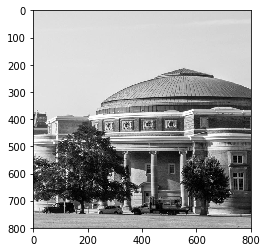

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/content/drive/My Drive/ccc.jpg",gray)
print (gray.shape)
plt.imshow(gray,cmap='gray')

In [0]:


def MyCorrelation(I,F,mode):
	image_h, image_w = I.shape[0], I.shape[1]
	filter_h, filter_w = F.shape[0], F.shape[1]

	if mode == 'valid':
		padding_v_h = image_h - filter_h + 1
		padding_v_w = image_w - filter_w + 1
		padding = np.zeros((padding_v_h,padding_v_w))
		
		for i in range(padding.shape[0]):
			for j in range(padding.shape[1]):
				padding[i,j] = np.sum(F * I[i:i+filter_h,j:j+filter_h])
		return padding
		
	elif mode == 'same':
		padding_s_h = image_h + filter_h - 1
		padding_s_w = image_w + filter_w - 1
		padding = np.zeros((padding_s_h,padding_s_w))

		padding[(filter_h - 1)//2:(image_h + (filter_h-1)//2),(filter_w - 1)//2:
            (image_w + (filter_w-1)//2)] = I
		return MyCorrelation(padding,F,'valid')

	elif mode == 'full':
		padding_f_h = image_h + 2 * filter_h - 2
		padding_f_w = image_w + 2 * filter_w - 2
		padding = np.zeros((padding_f_h,padding_f_w))

		padding[(filter_h - 1):(padding_f_h - (filter_h - 1)), (filter_w - 1):
            (padding_f_w - (filter_w - 1))] = I
		return MyCorrelation(padding,F,'valid')
  
def MyConvolution(I,F,mode):
	new_F = F[::-1,::-1]
	return MyCorrelation(I,new_F,mode)



[[1 2]
 [2 4]]


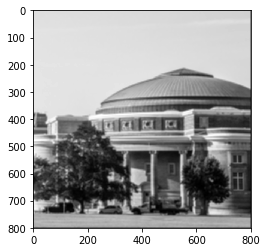

In [101]:
# kernel= 1/16 * np.array([[1,2,1],[2,4,2],[1,2,1]])
kernelX = cv2.getGaussianKernel(8, 5);
kernelY = cv2.getGaussianKernel(8, 5);
kernel = kernelX * np.transpose(kernelY)

res0 = MyCorrelation(gray,kernel,'valid')
cv2.imwrite("/content/drive/My Drive/gray_Gaussian_corrleation.jpg",res)
plt.imshow(res0,cmap='gray')

res = MyConvolution(gray,kernel,'same')
cv2.imwrite("/content/drive/My Drive/gray_Gaussian_convolution.jpg",res)
plt.imshow(res,cmap='gray')

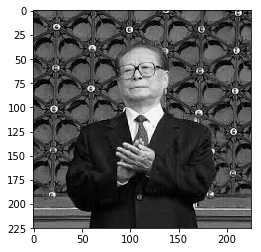

In [21]:
portrait = cv2.imread('/content/drive/My Drive/portrait.jpeg')
gray_portrait = cv2.cvtColor(portrait, cv2.COLOR_BGR2GRAY)
cv2.imwrite("/content/drive/My Drive/gray_portrait.jpg",gray_portrait)
plt.imshow(gray_portrait,cmap='gray')

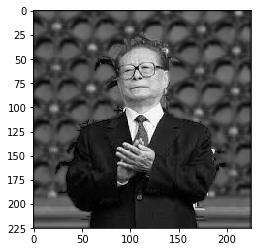

In [26]:

def portrait(I,mask):
  face = I * mask
  kernelX = cv2.getGaussianKernel(5, 3);
  kernelY = cv2.getGaussianKernel(5, 3);
  kernel = kernelX * np.transpose(kernelY)
  res = MyConvolution(I,kernel,'same')
  image_h, image_w = I.shape[0], I.shape[1]
  for i in range(face.shape[0]):
    for j in range(face.shape[1]):
      if face[i][j] == 0:
        face[i][j] = res[i][j]
  return face
mask = np.asarray(loadmat('/content/drive/My Drive/shenfinal.mat')['BW'])
res = portrait(gray_portrait,mask)
cv2.imwrite("/content/drive/My Drive/gray_portrait_Gaussian.jpg",res)
plt.imshow(res,cmap='gray')

In [32]:
separablefilter_init = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1,2,1]
])

separablefilter = 1/16 * separablefilter_init

nonSeparablefilter = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

def isSeparableFilter(F):
	u, s, v = np.linalg.svd(F)
	if np.linalg.matrix_rank(np.diag(s)) == 1:
		print (np.sqrt(s[0])* u[:,0])
		print (np.sqrt(s[0])* v[0,:])
		return True
	else:
		return False

res1 = isSeparableFilter(separablefilter)
print(res1)
res2 = isSeparableFilter(nonSeparablefilter)
print(res2)



[-0.25 -0.5  -0.25]
[-0.25 -0.5  -0.25]
True
False


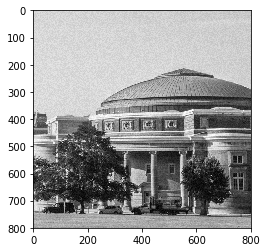

In [34]:

def AddRandNoise(I, m):
  new_gray = I/255
  noise = np.random.uniform(low=-m, high=m, size=(I.shape[0],I.shape[1]))
  result = noise + new_gray
  return result*255

gray_with_noise = AddRandNoise(gray,0.05)
cv2.imwrite("/content/drive/My Drive/gray_withRandNoise.jpg",gray_with_noise)
plt.imshow(gray_with_noise,cmap='gray')


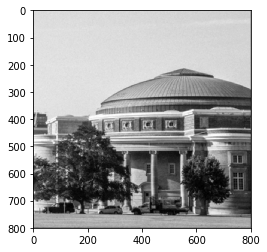

In [87]:
kernelX = cv2.getGaussianKernel(5, 5);
kernelY = cv2.getGaussianKernel(5, 5);
kernel = kernelX * np.transpose(kernelY)
res = MyConvolution(gray_with_noise,kernel,'same')
cv2.imwrite("/content/drive/My Drive/gray_remove_RandNoise.jpg",res)
plt.imshow(res,cmap='gray')


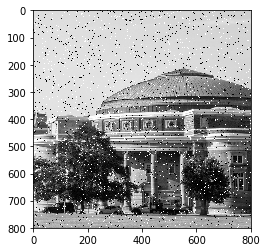

In [45]:
def AddSaltAndPepperNoise(I,prob):
    if(len(I.shape) == 2):
        output = np.zeros((I.shape[0],I.shape[1]),np.uint8)
        lower_threshold = prob/2
        upper_threshold = 1 - prob/2
        for i in range(I.shape[0]):
            for j in range(I.shape[1]):
                random_num = np.random.rand()
                if random_num < lower_threshold:
                    output[i][j] = 0
                elif random_num > upper_threshold:
                    output[i][j] = 255
                else:
                    output[i][j] = I[i][j]
    else:
      output = np.zeros((I.shape[0],I.shape[1],I.shape[2]),np.uint8)
      lower_threshold = prob/2
      upper_threshold = 1 - prob/2
      for i in range(I.shape[0]):
        for j in range(I.shape[1]):
          for k in range(I.shape[2]):
            random_num = np.random.rand()
            if random_num < lower_threshold:
                output[i][j][k] = 0
            elif random_num > upper_threshold:
                output[i][j][k] = 255
            else:
                output[i][j][k] = I[i][j][k]
    
    return output
  
gray_with_SP_noise = AddSaltAndPepperNoise(gray,0.05)
cv2.imwrite("/content/drive/My Drive/gray_SPNoise.jpg",gray_with_SP_noise)
plt.imshow(gray_with_SP_noise,cmap='gray')

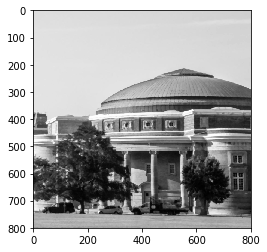

In [46]:
median= cv2.medianBlur(gray_with_SP_noise, 5)
cv2.imwrite("/content/drive/My Drive/gray_median.jpg",median)
plt.imshow(median, cmap = 'gray')

In [55]:
img1 = cv2.imread('/content/drive/My Drive/color.jpg')
def imshowBGR2RGB( im ):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  return
print(img1.shape)

(240, 240, 3)


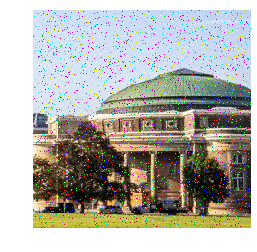

In [60]:
color_with_SP_noise = AddSaltAndPepperNoise(img1,0.05)
cv2.imwrite("/content/drive/My Drive/color_with_SP_noise.jpg",color_with_SP_noise)
imshowBGR2RGB(color_with_SP_noise)

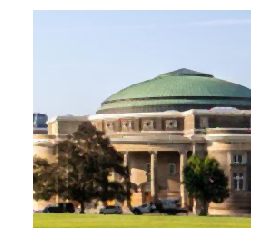

In [102]:
median_color= cv2.medianBlur(color_with_SP_noise, 3)
imshowBGR2RGB(median_color)

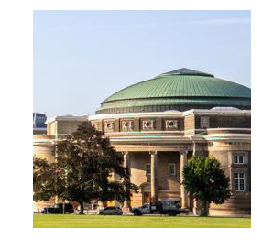

In [107]:

def remove_multichannel_SP_noise(I,k_size):
  padding_h = I.shape[0] - k_size + 1
  padding_w = I.shape[1] - k_size + 1
  filter_mean = np.ones((k_size, k_size),np.uint8)/(k_size*k_size)
  output = np.zeros((padding_h,padding_w,I.shape[2]),np.uint8)
  for i in range(output.shape[0]):
    for j in range(output.shape[1]):
      for k in range(output.shape[2]):
        if I[i+k_size//2][j+k_size//2][k] == 0 or I[i+k_size//2][j+k_size//2][k] == 255:
          window = I[i:i+k_size,j:j+k_size,k]
          if I[i+k_size//2][j+k_size//2][k] == 0:
            if np.sum(window) == (k_size*k_size - 1) * 255:
              output[i][j][k] = 255
            elif not np.isin(255,window):
              index = np.argwhere(window==0)
              new_window = np.delete(window,index)
              output[i][j][k] = np.median(new_window)
            else:
              output[i][j][k] = np.sum(filter_mean*I[i:i+k_size,j:j+k_size,k])
      
          if I[i+k_size//2][j+k_size//2][k] == 255:
            if np.sum(I[i:i+k_size,j:j+k_size,k]) == 255:
              output[i][j][k] = 0
            elif not np.isin(0,window):
              index = np.argwhere(window==255)
              new_window = np.delete(window,index)
              output[i][j][k] = np.median(new_window)
            else:
              output[i][j][k] = np.sum(filter_mean*I[i:i+k_size,j:j+k_size,k])
        else:
          output[i][j][k] = I[i+k_size//2][j+k_size//2][k]
  return output
            
res = remove_multichannel_SP_noise(color_with_SP_noise,3)
cv2.imwrite("/content/drive/My Drive/color_remove.jpg",res)
imshowBGR2RGB(res)